The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [11]:
raw_train = pd.read_csv('train.csv').drop('id',axis= 1)
original = pd.read_csv('ObesityDataSet.csv')


In [12]:
train_set = set(raw_train.columns)
org_set = set(original.columns)

train_set - org_set

set()

In [13]:
whole_train = pd.concat([raw_train, original], axis=0)
whole_train.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [15]:
# the datatypes seems to be alright
whole_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22869 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             22869 

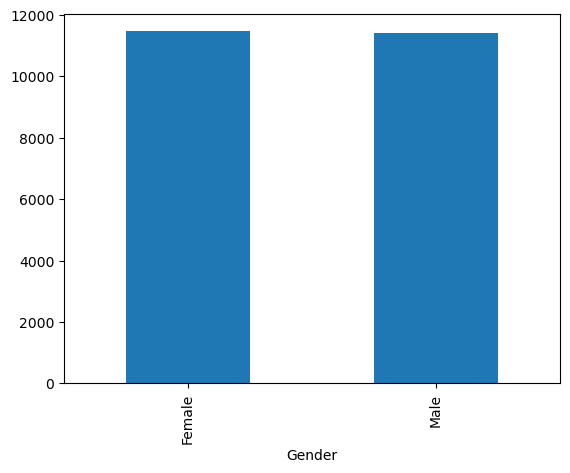

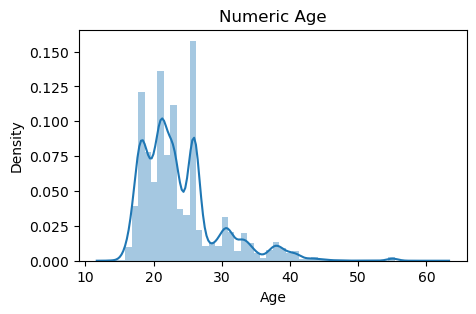

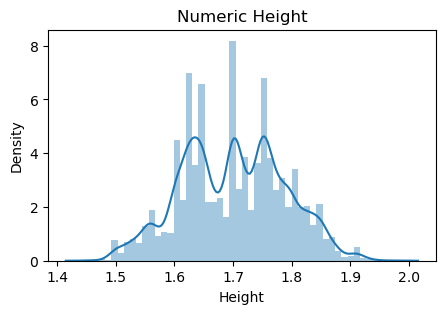

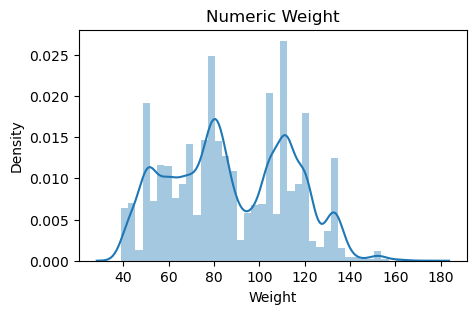

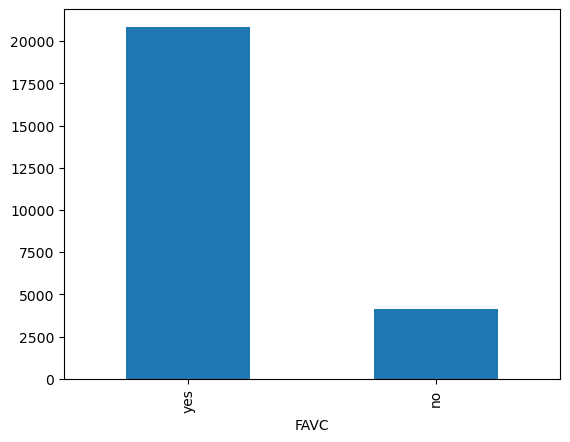

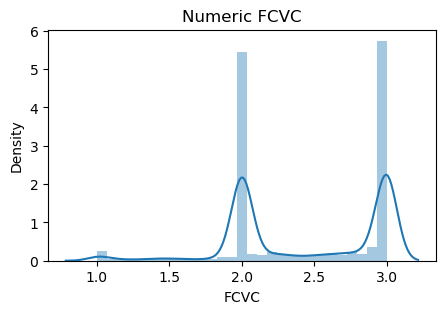

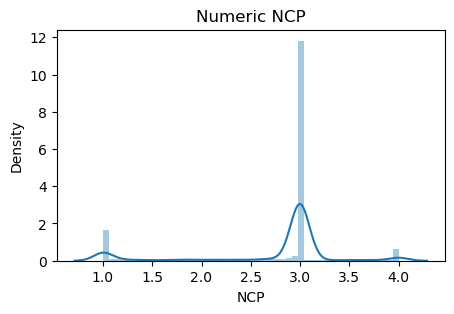

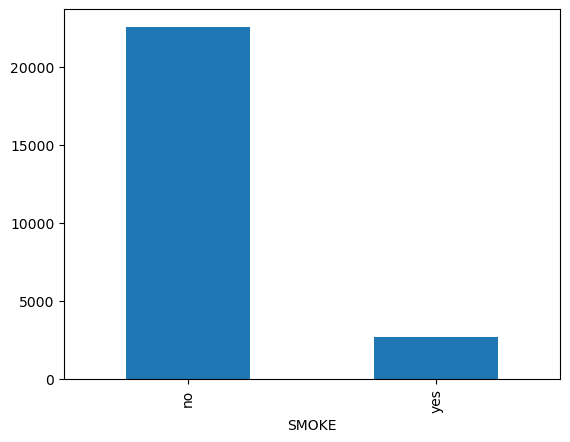

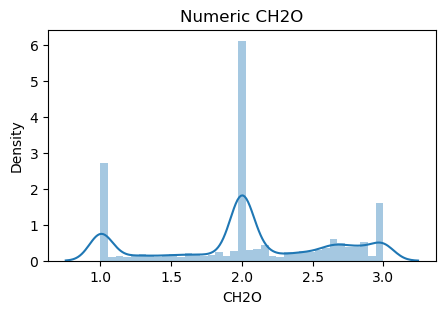

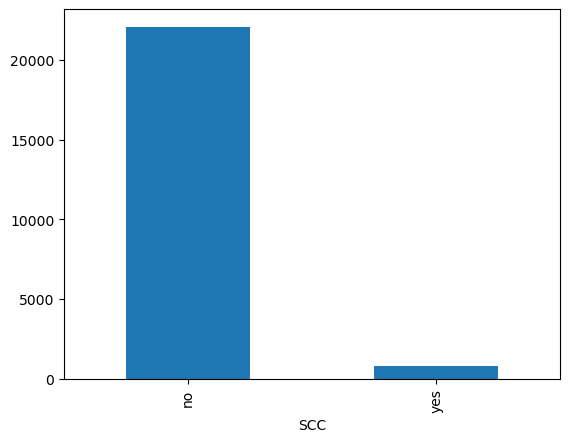

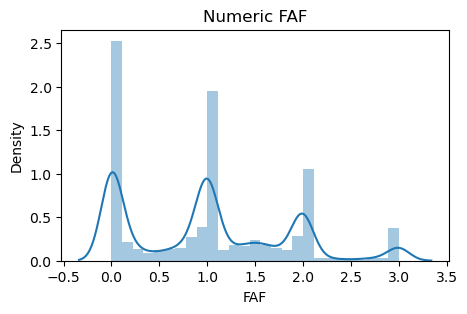

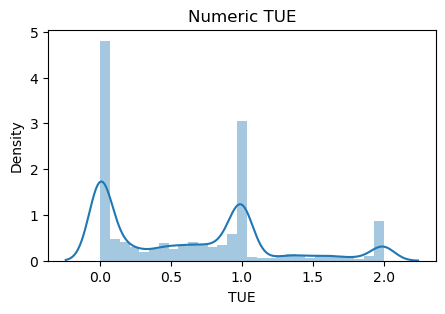

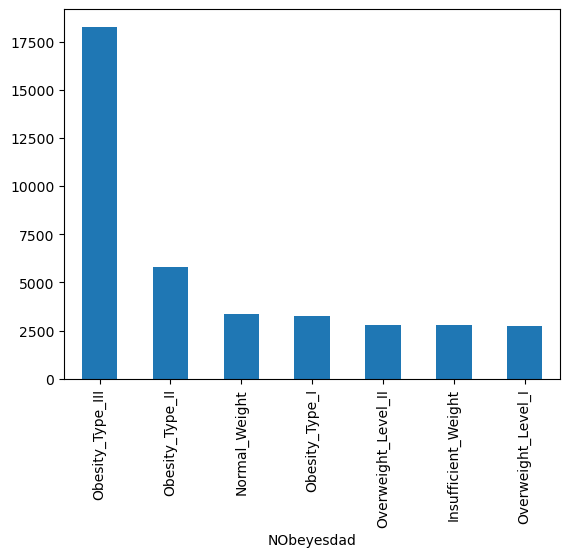

In [29]:
# do some initial plotting for feature engineering
warnings.filterwarnings('ignore')
for col in whole_train:
    if whole_train[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(5,3))
        sns.distplot(whole_train[col])
        plt.title(f'Numeric {col}')
        plt.show()
    else:
        whole_train[col].value_counts().plot(kind = 'bar')
        
        

In [37]:
# group by different features 
for col in whole_train:
    if col == 'NObeyesdad':
        continue 
    if whole_train[col].dtype in ['int64', 'float64']:
        new = whole_train.groupby('NObeyesdad')[col].mean().sort_values(ascending=True)
        print(f'under {col} the grouped is \n{new}')
        print()
    else:
        new = whole_train.groupby('NObeyesdad')[col].value_counts().unstack()
        print(f'under {col} the grouped is \n{new}')
        print()
    
    

under Gender the grouped is 
Gender               Female  Male
NObeyesdad                       
Insufficient_Weight    1794  1001
Normal_Weight          1801  1568
Obesity_Type_I         1423  1838
Obesity_Type_II          10  3535
Obesity_Type_III       4364     6
Overweight_Level_I     1215  1502
Overweight_Level_II     858  1954

under Age the grouped is 
NObeyesdad
Insufficient_Weight    19.379977
Normal_Weight          20.881234
Overweight_Level_I     23.084953
Obesity_Type_III       24.080042
Obesity_Type_I         25.116325
Overweight_Level_II    26.131593
Obesity_Type_II        27.751251
Name: Age, dtype: float64

under Height the grouped is 
NObeyesdad
Normal_Weight          1.671242
Obesity_Type_III       1.676863
Insufficient_Weight    1.684416
Overweight_Level_I     1.686982
Obesity_Type_I         1.693541
Overweight_Level_II    1.705914
Obesity_Type_II        1.781800
Name: Height, dtype: float64

under Weight the grouped is 
NObeyesdad
Insufficient_Weight     49.865207
N

In [39]:
whole_train.select_dtypes(include=['float64']).describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000
mean,23.885263,1.700377,87.767610,2.443428,2.754344,2.027442,0.984382,0.620551
std,5.753419,0.087881,26.364243,0.533329,0.712711,0.608901,0.839466,0.602850
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631662,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,22.815416,1.700000,84.000000,2.392665,3.000000,2.000000,1.000000,0.579541
75%,26.000000,1.763029,111.531208,3.000000,3.000000,2.535127,1.596576,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [54]:
class CONSTANTS:
    veg_bins = [1,2,2.4,3]
    veg_cate = ['low', 'median','high']
    
    faf_bins = [0,0.016,1,1.6,3]
    faf_cate = ['low', 'median','high','veryhigh']
    

class Prepocess:
    def __init__(self):
        self.train_data = whole_train
        self.test_data = pd.read_csv('test.csv')
        self.id = self.test_data['id']
    
    def feature_engineer(self)->None:
        
        def num_cate_splite(df:pd.DataFrame):
            num_df = df.select_dtypes(include=['int64', 'float64'])
            cate_df = df.select_dtypes(include=['object'])
            return num_df, cate_df
        
        def features(df:pd.DataFrame, is_train:bool) -> pd.DataFrame:
           
            df['bmi'] = df['Weight']/(df['Height']**2)
            
            #mutiple risk factors
            df['agerisk'] = [age >= 25 for age in df['Age']]
            df['binFA'] = pd.cut(df['FCVC'], bins = CONSTANTS.veg_bins, labels=CONSTANTS.veg_cate, right= False)
            df['faf_bin'] = pd.cut(df['FAF'], bins= CONSTANTS.faf_bins, labels= CONSTANTS.faf_cate, right= False)
            
            if is_train:
                label = df['NObeyesdad']
                num_df, cate_df = num_cate_splite(df.drop('NObeyesdad', axis=1))
                encoded = pd.get_dummies(cate_df, drop_first=True)
                encoded['NObeyesdad'] = label
                return pd.concat([num_df, encoded], axis=1)
            
            else:
                num_df, cate_df = num_cate_splite(df.drop('id',axis=1))
                encoded = pd.get_dummies(cate_df, drop_first=True)
                return pd.concat([num_df, encoded], axis=1)
        self.train_data = features(self.train_data, is_train=True)
        self.test_data = features(self.test_data, is_train=False)
        

In [55]:
prepro = Prepocess()
prepro.feature_engineer()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


class Basemodel:
    def predict(self, Xtest):
        raise NotImplementedError
    def fit(self, Xtrain, ytrain):
        raise NotImplementedError
    

class VotingClass(Basemodel):
    
    def __init__(self):
        xgb = XGBClassifier()
        cat = CatBoostClassifier()
        light = LGBMClassifier()
        gab = GradientBoostingClassifier()
        self.model = VotingClassifier(estimators= [
            ('xgb', xgb), ('cat', cat), ('light',light), ('gb', gab)
        ], voting='soft')
        
    def fit(self, Xtrain, ytrain):
        self.model.fit(Xtrain, ytrain)
   
    def predict(self, Xtest):
        return self.model.predict(Xtest)
class Trainer:
    def __init__(self, data:pd.DataFrame, model:Basemodel):
        self.model = model
        self.data = data
        
    def train_model(self, tune:bool):
        if not tune:
            Xtrain, Xtest,ytrain,ytest = train_test_split(self.data.drop('NObeyesdad', axis = 1), self.data['NObeyesdad'], test_size=.3, stratify=self.data['NObeyesdad'])
            
            self.model.fit(Xtrain, ytrain)
            
            print(f'The model has a validation loss of {accuracy_score(self.model.predict(Xtest), ytest)}')
            print(f'the train loss is {accuracy_score(self.model.predict(Xtrain), ytrain)}')
            return Xtest, ytest
            
       
        
        

In [73]:
vote = VotingClass()
trainer = Trainer(data= prepro.train_data, model=vote)
Xtest,ytest = trainer.train_model(tune=False)


Learning rate set to 0.091147
0:	learn: 1.6402025	total: 13.5ms	remaining: 13.5s
1:	learn: 1.4090311	total: 22.3ms	remaining: 11.1s
2:	learn: 1.2502342	total: 29.3ms	remaining: 9.73s
3:	learn: 1.1265772	total: 37ms	remaining: 9.22s
4:	learn: 1.0309485	total: 44ms	remaining: 8.76s
5:	learn: 0.9488149	total: 51.1ms	remaining: 8.47s
6:	learn: 0.8866242	total: 58ms	remaining: 8.23s
7:	learn: 0.8295583	total: 65.2ms	remaining: 8.08s
8:	learn: 0.7816125	total: 72.1ms	remaining: 7.93s
9:	learn: 0.7387610	total: 79.2ms	remaining: 7.84s
10:	learn: 0.6993006	total: 86.3ms	remaining: 7.76s
11:	learn: 0.6679955	total: 93.4ms	remaining: 7.69s
12:	learn: 0.6379818	total: 101ms	remaining: 7.66s
13:	learn: 0.6114483	total: 109ms	remaining: 7.64s
14:	learn: 0.5885705	total: 116ms	remaining: 7.64s
15:	learn: 0.5664157	total: 124ms	remaining: 7.62s
16:	learn: 0.5476753	total: 132ms	remaining: 7.6s
17:	learn: 0.5304933	total: 139ms	remaining: 7.56s
18:	learn: 0.5139067	total: 146ms	remaining: 7.52s
19:	le

In [74]:
sec_pred = vote.predict(prepro.test_data)

In [75]:
df1 = pd.DataFrame({'id':prepro.id, 'NObeyesdad':sec_pred})
df1.to_csv('sec.csv', index=False)